In [2]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt

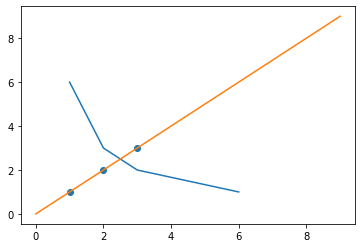

In [9]:

# Matplotlib Examples
plt.plot([1,2,3,6],[6,3,2,1]) #line그려주기
plt.scatter([1,2,3],[1,2,3]) #dot그려주기
plt.plot(np.arange(10),np.arange(10))
plt.show()

In [5]:
def draw_plot(X, Y, x_sample, y_sample):
    for i in range(len(X)):
        plt.plot(X[i], Y[i])
    plt.scatter(x_sample,y_sample)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color = 'black')
    plt.axvline(0, color = 'black')
    plt.show()

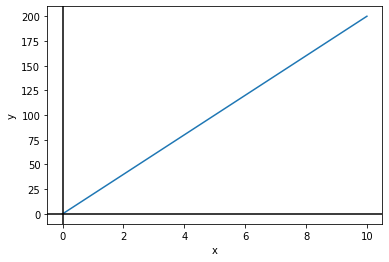

In [15]:
x = np.linspace(0,10,20)
y = np.linspace(0,200,20)
#plt.scatter(x,y)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (5,)

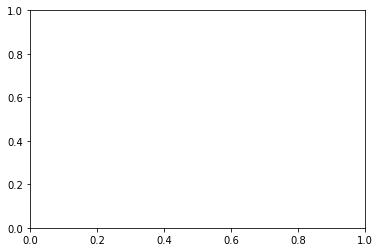

In [28]:
foo = lambda x: -(2/7*x**3-9/2*x**2+15*x-10.)
x_line = np.linspace(0,10,100)
y_line = foo(x_line)
plt.plot(x_line,y,'r')
plt.show()

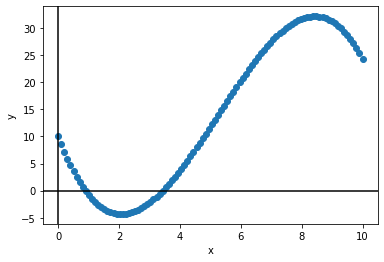

In [20]:
draw_plot((x_line),y,x_line,y)

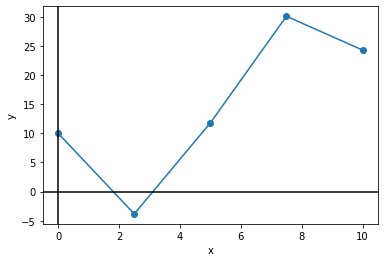

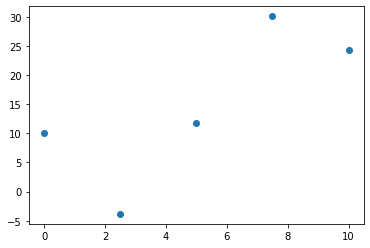

In [25]:
# using linspace, sample 5points of foo in the domain (0,10) and visualize with draw_plot

x_line = np.linspace(0,10,5)
y_line = foo(x_line)

draw_plot([x_line],[y_line],x_line,y_line)
plt.scatter(x_line, y_line)



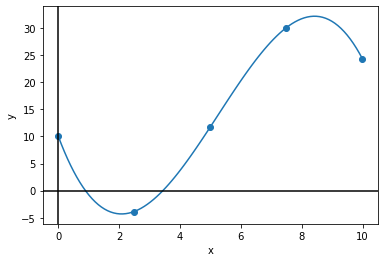

In [32]:
# sample 5 points of foo in the domain (0,10) with gaussian noise where mu=0, sigma=0.1 and visualize.
noise = np.random.normal(0,0.1)
x_sample = np.linspace(0,10,5) + noise
y_sample = foo(x_sample) +noise
np.random.seed(seed=0)
draw_plot([x_line],[y_line], x_sample,y_sample)


In [30]:
# Linear Regression

from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()

lr.fit(x_sample[:,None], y_sample)
r2 = lr.score(x_sample[:,None], y_sample)
print("R^2:%f" % r2)

y_hat = lr.predict(x_sample[[0], None])
print(x_sample[0])
print(y_hat)

R^2:0.554556
-0.005342905358390735
[1.98196948]


In [43]:
print("MSE:%f" % ((y_sample - y_hat)*(2)).mean())

MSE:24.976857


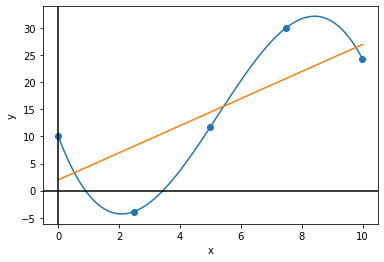

In [45]:
y_lr = lr.predict(x_line[:, None])
draw_plot([x_line, x_line],[y_line, y_lr],x_sample, y_sample)

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
poly = PolynomialFeatures(degree=2)

x_sample_poly = poly.fit_transform(x_sample[:, None])

pr = LinearRegression().fit(x_sample_poly, y_sample)

In [58]:
print(x_sample[:,None])
print(x_sample_poly)

[[-5.34290536e-03]
 [ 2.49465709e+00]
 [ 4.99465709e+00]
 [ 7.49465709e+00]
 [ 9.99465709e+00]]
[[ 1.00000000e+00 -5.34290536e-03  2.85466377e-05]
 [ 1.00000000e+00  2.49465709e+00  6.22331402e+00]
 [ 1.00000000e+00  4.99465709e+00  2.49465995e+01]
 [ 1.00000000e+00  7.49465709e+00  5.61698850e+01]
 [ 1.00000000e+00  9.99465709e+00  9.98931704e+01]]


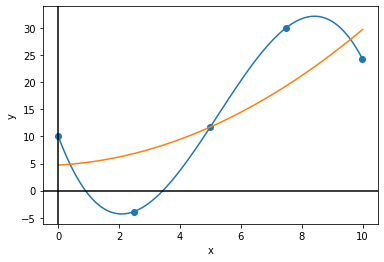

In [68]:
x_line_poly = poly.fit_transform(x_line[:,None])
y_poly = pr.predict(x_line_poly)

draw_plot([x_line,x_line],[y_line,y_poly],x_sample, y_sample)

In [70]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

Iris = load_iris()

In [72]:
Iris_Data = pd.DataFrame(data = np.c_[Iris['data'], Iris['target']], columns = Iris['feature_names']+['target'])
Iris_Data['target'] = Iris_Data['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

X_Data = Iris_Data.iloc[:,:-1]
Y_Data = Iris_Data.iloc[:,[-1]]

In [73]:
X_Data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [74]:
X,y = load_iris(return_X_y=True)

In [75]:
y.shape

(150,)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [111]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=1234)
logistic.fit(X_train[:,:2], y_train)

LogisticRegression(random_state=1234)

In [112]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=1234)
svm.fit(X_train[:,:2],y_train)

SVC(kernel='linear', random_state=1234)

In [113]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1234)
dt.fit(X_train[:,:2],y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1234)

In [114]:
from sklearn.metrics import accuracy_score

y_pred_log = logistic.predict(X_test[:,:2])
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_log))

Accuracy: 0.73


In [115]:
y_pred_svc = svm.predict(X_test[:,:2])
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_svc))

Accuracy: 0.73


In [116]:
y_pred_tree = dt.predict(X_test[:,:2])
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tree))

Accuracy: 0.60


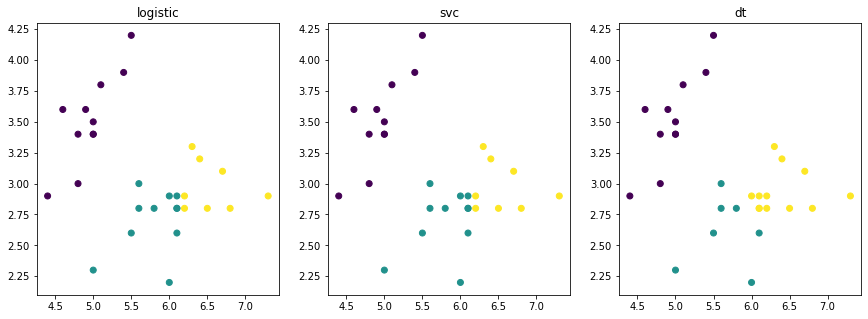

In [122]:
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.title('logistic')
plt.scatter(X_test[:, 0], X_test[:,1], c=y_pred_log)

plt.subplot(142)
plt.title('svc')
plt.scatter(X_test[:, 0], X_test[:,1], c=y_pred_svc)

plt.subplot(143)
plt.title('dt')
plt.scatter(X_test[:, 0], X_test[:,1], c=y_pred_tree)